# CS410/510 Yelp Data Analysis
By Team Portland Foodies (Qiacheng Li and Yiming Zhang)
<br>

Project website:
[https://portlandfoodies.github.io](https://portlandfoodies.github.io)

Project repo:
https://github.com/portlandfoodies/portlandfoodies.github.io

Website repo:
https://github.com/portlandfoodies/yelp-data-analysis

Scripts used for Yelp Fusion API:
https://github.com/portlandfoodies/portlandfoodies.github.io/tree/master/scripts




## Goals and Description
<br>
Yelp is currently the most widely used restaurant and merchant information software application not only in the United States but also in many other regions of the world. In this project, our team explored and communicated insights from Yelp's businesses, users, reviews dataset of Portland restaurants and learned how to properly develop and structure a visualization and machine learning project. The goal of this project is to provide market knowledge for new business owners in Portland and useful information of selecting restaurants for first time travelers in Portland.
<br>
<br>
We originally planned to use the dataset from Yelp data challenge. However, after we did some exploration of the dataset, we found there are no data records for restaurants in Portland. We adjusted our plan and fetched data from Yelp’s Fusion API. The dataset format is JSON files and we proprocess and convert them into csv for machine learning part of the project.


# Restaurant Categories in Portland, OR

![Categories](img/categories1.png)

The chart above shows restaurant categories in portland. The area that is bigger means there are more restaurants with this specific category. The purpose of this graph is to show customers which categories of restaurants are most popular in Portland. The intended audience would be first time travelers to Portland or any customers.


<br>
<br>

# Restaurant Categories in Portland, OR

![Categories2](img/categories2.png)
Another categories graph generated by Tableau, it also gives a count number for each category. As we can see here, Portlanders love to have breakfast & Bruch and Bars are most likely the go-to place at night.




# McDonald's, Burger King, and Burgerville Locations in Portland, OR
![fastfood](img/123.png)









## Part I User Review General Analysis

### Load The Dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#import json
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras.layers import Embedding, Dense, LSTM, LeakyReLU
from keras.models import load_model

Using TensorFlow backend.


In [7]:
df = pd.read_csv('reviews.csv')
df.head()

,business_reviews/id,business_reviews/url,business_reviews/text,business_reviews/rating,business_reviews/time_created,business_reviews/user/id,business_reviews/user/profile_url,business_reviews/user/image_url,business_reviews/user/name
0,3mnwZLSvbpz3gfov7F2b0g,https://www.yelp.com/biz/voodoo-doughnut-old-t...,Yes to donuts always but this place does it ri...,5,2020-01-13 17:30:05,hmUTJKOaB0vI19IRNxELjg,https://www.yelp.com/user_details?userid=hmUTJ...,https://s3-media2.fl.yelpcdn.com/photo/rDcrY8r...,Katie M.
1,5SZlakMNk_s-uxEjmO4flA,https://www.yelp.com/biz/voodoo-doughnut-old-t...,Yum!!!! My husband and I stopped here on our w...,5,2020-01-11 10:10:00,46Xncm_G1X0mi-_CLbccNw,https://www.yelp.com/user_details?userid=46Xnc...,https://s3-media1.fl.yelpcdn.com/photo/VMJdgt8...,Kristin A.
2,aWckloq3kFOWotKJThrM0Q,https://www.yelp.com/biz/voodoo-doughnut-old-t...,Fresh and creative as usual. Stop by every tim...,5,2020-01-03 20:10:59,xwct13wtcyasNAIK7C05iA,https://www.yelp.com/user_details?userid=xwct1...,https://s3-media1.fl.yelpcdn.com/photo/SzQ4JMO...,Susana C.
3,DJ_sm3nbGroAS3-EQ1m23g,https://www.yelp.com/biz/screen-door-portland?...,Where do I start this place is AmAzing. Walked...,5,2020-01-23 09:39:59,0arUBKiSonO9o2W1PGsvNA,https://www.yelp.com/user_details?userid=0arUB...,https://s3-media2.fl.yelpcdn.com/photo/M6KmiNC...,Food T.
4,RSOy6Xv9Ch3ETyVvsTERbw,https://www.yelp.com/biz/screen-door-portland?...,Expect a 45 minute wait. Two benches inside in...,4,2020-01-12 09:57:21,kWFd_18oJVyJ0aNOAwwRew,https://www.yelp.com/user_details?userid=kWFd_...,https://s3-media2.fl.yelpcdn.com/photo/MnRFFH4...,Joshua F.


In [8]:
df.describe()

,business_reviews/rating
count,3000.000000
mean,4.201667
std,1.130821
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
business_reviews/id                  3000 non-null object
business_reviews/url                 3000 non-null object
business_reviews/text                3000 non-null object
business_reviews/rating              3000 non-null int64
business_reviews/time_created        3000 non-null object
business_reviews/user/id             3000 non-null object
business_reviews/user/profile_url    3000 non-null object
business_reviews/user/image_url      2942 non-null object
business_reviews/user/name           3000 non-null object
dtypes: int64(1), object(8)
memory usage: 211.1+ KB


### Plot The Dataset

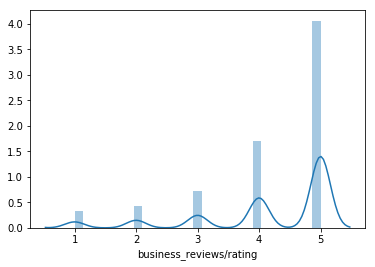

In [10]:
sb.distplot(df['business_reviews/rating'])

### Rating Distribution

In [11]:
df["business_reviews/rating"].value_counts()

5    1680
4     705
3     296
2     178
1     141
Name: business_reviews/rating, dtype: int64

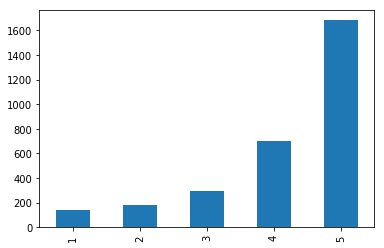

In [13]:
star_count = df["business_reviews/rating"].value_counts()
star_count.reindex([1, 2, 3, 4, 5]).plot.bar()

Most users give 5 stars.

### Rating vs Year & Rating vs Month

Text(0.5, 1.0, 'Ratings vs Year ')

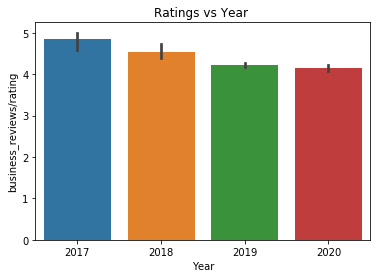

In [15]:
df["date"]= pd.to_datetime(df["business_reviews/time_created"]).dt.date
df.set_index('date').head(1)
df["Year"] = pd.to_datetime(df["business_reviews/time_created"]).dt.year
sb.barplot(x=df["Year"], y=df["business_reviews/rating"], data=df)
plt.title("Ratings vs Year ")

Text(0.5, 1.0, 'Ratings vs month ')

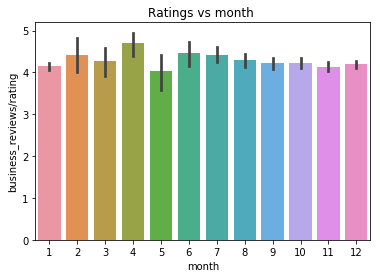

In [17]:
df["date"]= pd.to_datetime(df["business_reviews/time_created"]).dt.date
df.set_index('date').head(1)
df["month"] = pd.to_datetime(df["business_reviews/time_created"]).dt.month
sb.barplot(x=df["month"], y=df["business_reviews/rating"], data=df)
plt.title("Ratings vs month ")

### Do low rating reviews tend to be longer in text?

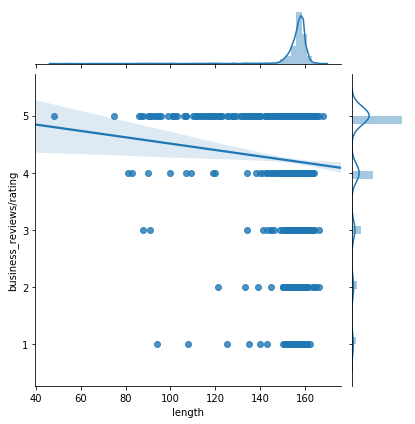

In [18]:
df["length"] = df["business_reviews/text"].apply(len)
sb.jointplot(x=df["length"],
              y=df["business_reviews/rating"],
              data=df, kind='reg')

The rating is decreasing as the text length increases.

## Part II Machine Learning for Sentiment Analysis

### Goals

Each Portland restaurant in the dataset is rated by user reviews. By understanding the reviews and there positive/negative judgment, businesses can improve their performance to meet the expectation of customers.

### Preprocessing Dataset


In [19]:
df = pd.read_csv('reviews.csv')
df = df[['business_reviews/rating', 'business_reviews/text']]
df.rename(columns = {'business_reviews/rating': 'stars', 'business_reviews/text': 'text'}, inplace = True)
df.head()

,stars,text
0,5,Yes to donuts always but this place does it ri...
1,5,Yum!!!! My husband and I stopped here on our w...
2,5,Fresh and creative as usual. Stop by every tim...
3,5,Where do I start this place is AmAzing. Walked...
4,4,Expect a 45 minute wait. Two benches inside in...


In [20]:
# Lowercase all words in the reviews
df['processed_text'] = df['text'].str.lower()

In [21]:
# Tokenize the reviews
# Simultaneously the punctation is removed
tokenize = RegexpTokenizer('\w+')
df['processed_text'] = df['processed_text'].apply(lambda review : tokenize.tokenize(review))

In [22]:
# Remove stopwords for the reviews
stoplist = stopwords.words('english')
df['processed_text'] = df['processed_text'].apply(lambda review: ' '.join([word for word in review if word not in stoplist]))

In [23]:
df['processed_text'].head()

0    yes donuts always place right light fluffy air...
1    yum husband stopped way back san diego washing...
2    fresh creative usual stop every time town cali...
3    start place amazing walked late tuesday mornin...
4    expect 45 minute wait two benches inside case ...
Name: processed_text, dtype: object

In [24]:
# Stemming the words in the reviews
stemmer = SnowballStemmer('english')
df['processed_text'] = df['processed_text'].apply(lambda review: ' '.join([stemmer.stem(word) for word in review.split()]))

In [25]:
print('The max length of words in a review before preprocessing:', max(df['text'].agg(len)))
print('The max length of words in a review after preprocessing:', max(df['processed_text'].agg(len)))

The max length of words in a review before preprocessing: 168
The max length of words in a review after preprocessing: 126


### Analyse The Reviews

### Most Common Words For High Rating Reviews

In [32]:
counter_words = Counter(" ".join(df.loc[df['stars'] == 5]['processed_text']).split())
counter_words.most_common(10)

[('place', 537),
 ('food', 445),
 ('portland', 304),
 ('great', 304),
 ('love', 263),
 ('good', 254),
 ('time', 209),
 ('best', 195),
 ('friend', 192),
 ('one', 184)]

### Most Common Words For Low Rating Reviews

In [33]:
counter_words = Counter(" ".join(df.loc[df['stars'] == 1]['processed_text']).split())
counter_words.most_common(10)

[('food', 36),
 ('place', 34),
 ('servic', 28),
 ('order', 28),
 ('time', 28),
 ('review', 20),
 ('good', 19),
 ('go', 18),
 ('one', 17),
 ('experi', 17)]

In [35]:
# Total different words
counter_words = Counter(" ".join(df['processed_text']).split())
print('Number of different words in the review:', len(counter_words.most_common()))

Number of different words in the review: 5007


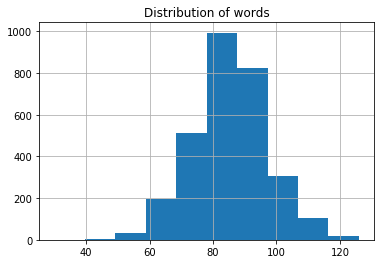

count    3000.000000
mean       85.245667
std        11.892314
min        30.000000
25%        78.000000
50%        85.000000
75%        93.000000
max       126.000000
dtype: float64

In [36]:
# Distribution of the number of words in a review
reviews_len = [len(x) for x in df['processed_text']]
pd.Series(reviews_len).hist()
plt.title('Distribution of words')
plt.show()
pd.Series(reviews_len).describe()

### Relabel The Rating

In [37]:
# The value 1 indicates a positive review
# The value 0 indicates a negative review
df['stars_relabeled'] = [1 if x > 3 else 0 for x in df['stars']]

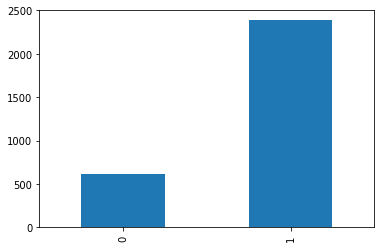

In [38]:
# Distribution of the relabeld star ratings
star_relabeld_count = df['stars_relabeled'].value_counts()
star_relabeld_count.reindex([0, 1]).plot.bar()

### Balance The Dataset

In [39]:
# Oversampling the negative reviews
df_stars_1 = df[df['stars_relabeled']==1]
df_stars_0 = df[df['stars_relabeled']==0].sample(star_relabeld_count[1], replace=True, random_state=42)
df_balanced = pd.concat([df_stars_0, df_stars_1], axis=0)
df_balanced = df_balanced.reset_index(drop=True)

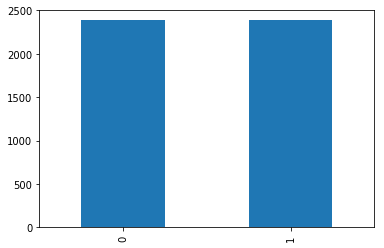

In [40]:
# Distribution of the relabeld star ratings
star_relabeld_balanced_count = df_balanced['stars_relabeled'].value_counts()
star_relabeld_balanced_count.reindex([0, 1]).plot.bar()

### Padding And Pruning The Reviews

For inputing the reviews in a neural network, all reviews have to be from equal length. Hence, pad to short reviews with 0 and prune to long reviews to the maximal length. At the same time the words are transformed to numbers.


In [41]:
VOCAB_LEN = 5007
SEQ_LEN = 100
tokenizer = Tokenizer(num_words=VOCAB_LEN)
tokenizer.fit_on_texts(df_balanced['processed_text'])
sequences = tokenizer.texts_to_sequences(df_balanced['processed_text'])
X = pad_sequences(sequences, maxlen=SEQ_LEN)
target = df_balanced['stars_relabeled']
X.shape

(4770, 100)

### Split Dataset Into Train, Validation And Test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X , target, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.50, random_state=42)
print('Shape of X_train:', X_train.shape)
print('Shape of X_val:  ', X_val.shape)
print('Shape of X_test: ', X_test.shape)

Shape of X_train: (1669, 100)
Shape of X_val:   (1670, 100)
Shape of X_test:  (1431, 100)


### Train the Model (Neural Network)


In [43]:
EMB_DIM = 100
model1 = Sequential()
model1.add(Embedding(VOCAB_LEN, EMB_DIM, input_length=SEQ_LEN))
model1.add(LSTM(units=EMB_DIM, dropout=0.4, recurrent_dropout=0.4))
model1.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [44]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          500700    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 581,201
Trainable params: 581,201
Non-trainable params: 0
_________________________________________________________________


In [45]:
result_model1 = model1.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1669 samples, validate on 1670 samples
Epoch 1/5
1669/1669 [==============================] - 7s 4ms/step - loss: 0.6842 - accuracy: 0.5722 - val_loss: 0.6597 - val_accuracy: 0.5689
Epoch 2/5
1669/1669 [==============================] - 6s 4ms/step - loss: 0.5134 - accuracy: 0.7855 - val_loss: 0.5032 - val_accuracy: 0.7641
Epoch 3/5
1669/1669 [==============================] - 6s 4ms/step - loss: 0.2674 - accuracy: 0.9017 - val_loss: 0.4731 - val_accuracy: 0.8000
Epoch 4/5
1669/1669 [==============================] - 6s 4ms/step - loss: 0.1485 - accuracy: 0.9503 - val_loss: 0.4933 - val_accuracy: 0.8114
Epoch 5/5
1669/1669 [==============================] - 6s 4ms/step - loss: 0.0817 - accuracy: 0.9766 - val_loss: 0.5755 - val_accuracy: 0.8114


### Evaluate The Model

In [55]:
score_train_m1, accu_train_m1 = model1.evaluate(X_train, y_train)
score_val_m1, accu_val_m1 = model1.evaluate(X_val, y_val)
score_test_m1, accu_test_m1 = model1.evaluate(X_test, y_test)
print('The accuracy of the neural network:')
print('Train Set:      ', accu_train_m1)
print('Validation Set:', accu_val_m1)
print('Test Set:     ', accu_test_m1)

1431/1431 [==============================] - 1s 804us/step
The accuracy of the neural network:
Train Set:       0.9958058595657349
Validation Set: 0.811377227306366
Test Set:      0.8183088898658752


### Plot The Results

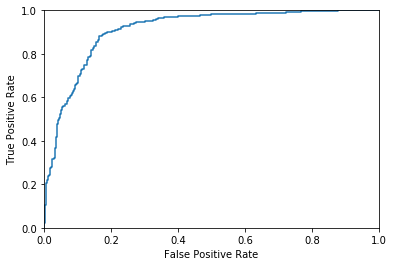

In [57]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
predicted = model1.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predicted)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show() 

# Lessons Learned
<br>


## What went well?

In this project, we have done many things right. First of all, we have regular and efficient team communication. Since there are only two team members in our team, scheduling weekly meetings is relatively easy for us. Secondly, we chose the right project and right data set. Besides the reason that we are both passionate and enthusiastic about foods, Yelp offers us a rich data set with a lot of useful information for businesses and reviews from which we can derive all kinds of interesting exploration and analyses. The dataset which contains a bunch of JSON files are pretty straight and relatively easy to process so that we do not have to spend a huge amount of time to incorporate and normalize the data as some other teams did. Last but not least, we strictly followed our schedule and made progress every week through the term.
<br>

## What (unexpected) issues did you encounter? How did you resolve those issues?
<br>
<br>
We originally planned to use the dataset from Yelp data challenge. However, after we did some exploration of the dataset, we found there are no data records for restaurants in Portland. We adjusted our plan and did more research and found we can get access to Yelp’s Fusion API and fetch data from it.
<br>

Thanks to Yelp Fusion API, we can fetch Portland Yelp data and turned that into our own dataset in extension to the  Yelp challenge dataset.

## What took more time and/or was more difficult or easy than you expected? 
<br>
The most time consuming and challenging part of the project is to find the right tools for different parts of the project. For instance, we originally plan to just use Tableau to do visualization and python to process the dataset. As the plan progressed, we learned that Leaflet offers better interface for web interaction visualization. Therefore, we did some of the visualizations using Leaflet.js and incorporated them with web interface. Another example is for machine learning, we did a lot of research and finally found that LSTM model in Neural Network was the best fit for our text related sentiment anylysis.

in Addition, Learning how to create visulization charts using javascript in our project website was the most time-consuming part. The time it takes us to retrive the data, clean the data, and creating visulization charts is longer than expected. 


## What did you think of the tools that you chose for the project?
<br>
The tools that we chose for this project were incredibly useful not only in school but also for work. We have explored various tools/frameworks such as Tableau, Pandas, Leaflet.js, React.js, etc.

Tableau:
    Easy to use. Tableau provides an user-friendly interface. It helped us to get the Yelp data modeled, and since the data we get from Yelp API is in json format, we simply imported the json file in Tableau and chose attributes then the application would handle the work for us. 

Leaflet.js:
    Leaflet is a web mapping js libaray, and it provides great interactive maps and plots.

React.js:
    React is a front-end web framework, and it provides rich javascript web application support which helped us to get the website up and running quickly with github pages. 









# Conclusion
<br>
In this project, we employ many tools and techniques to analysis business and review information from Portland restaurants using Yelp fusion API. Firstly, we preprocess the dataset using python and utilize Tableau and Leaflet to do the visualization. For machine learning, LSTM model in Neural Network seems to perform the best among those models we tried to perdict rating from review text.Finally, we incorperate Github pages, React.js, bootstrap.js, Leaflet.js to create interactive visualization webpages.In the future, we plan to analyze Yelp data from more cities and compare data visualizations between them.
<br>
<br>

